<a href="https://colab.research.google.com/github/GuanRuLai/Python-Maching-Learning/blob/main/Thompson_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing

## Import dataset

In [1]:
import pandas as pd
df = pd.read_csv("Ads_CTR_Optimisation.csv")

# Reinforcement learning model processing

## Model training

In [2]:
import random

N = 1000 # the number of rounds/users is 10000(can be adjust to test the model)
d = 10 # the number of kinds of ads
ads_selected = []
numbers_of_rewards_0 = [0] * d
numbers_of_rewards_1 = [0] * d
total_rewards = 0

for n in range(0, N):
  ad = 0
  max_random = 0

  for i in range(0, d):
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    if random_beta > max_random:
      max_random = random_beta
      ad = i

  ads_selected.append(ad)
  reward = df.values[n, ad]
  if reward == 1:
    numbers_of_rewards_1[ad] += 1
  else:
    numbers_of_rewards_0[ad] += 1
  total_rewards += reward

## Visualizing the results

Text(0, 0.5, 'Number of times each ad was selected')

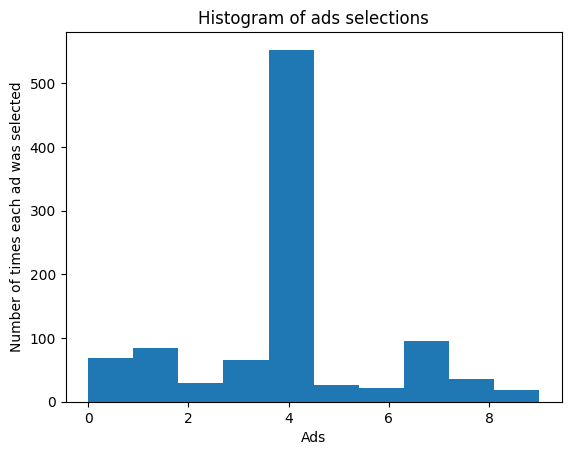

In [3]:
import matplotlib.pyplot as plt

plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")